Nom de l'élève : ....

# Activité numérique : Les lois de Kepler
## 1. Problématique  
Johannes Kepler (1571-1630) utilise des relevés d'observations accumulés durant des années par l'astronome danois Tycho Brahe (1546-1601) pour décrire un nouveau modèle du système solaire basé sur l'héliocentrisme. Les orbites ne sont plus circulaires mais elliptiques, le Soleil étant placé à un des foyers de l'ellipse, ce qui lui permet d'expliquer la variation de vitesse des planètes. Il énonce alors trois lois, sans les démontrer ; elles lui permettent de prévoir avec une grande précision la position des différentes planètes.
Isaac Newton (1643-1727) valide déﬁnitivement les lois de Kepler en les démontrant. Il ouvre ainsi la voie à une explication et aux prédictions des phénomènes d'astronomie.


__Objectif :__ Exploiter, à l'aide d'un langage de programmation, des données astronomiques ou satellitaires pour tester les  lois de Kepler.


## 2. Travail demandé
Vous devrez :
- lire ce _notebook_ et exécuter au fur et à mesure toutes les cellules de code (taper au clavier <kbd>SHIFT</kbd>+<kbd>ENTER</kbd> ou <kbd>MAJ</kbd>+<kbd>ENTRÉE</kbd>).
- analyser les résultats obtenus
- répondre aux questions en sélectionnnant avec la souris la cellule textuelle située juste en dessous de la question afin de pouvoir y rédiger votre réponse.
- modifier certaines lignes du code quand cela vous sera demandé.

### __<font style="color:#FF0000;">Attention :</font>__  
<B><font style="color:#FF0000;"> Il est important de sauvegarder votre travail très régulièrement. Pour cela il faut cliquer sur le bouton représentant une disquette qui se trouve en haut à gauche dans la barre de boutons (Créer  une nouvelle sauvegarde).</font></B>

## 3. Première loi de Kepler

### 1$^{ère}$ loi de Kepler
Les orbites des planètes autour du Soleil ne sont pas des cercles, mais des ellipses. Un cercle est caractérisé par son centre C et son rayon r, tandis qu'une ellipse est caractérisée par son centre 0, son __demi-grand axe a__, ses deux __foyers F et F'__, et son __excentricité e = c/a__, où __c = OF = OF'__. Le Soleil occupe l'un des deux foyers de cette ellipse. La position de la planète au plus proche du Soleil est appelée __périhélie__ et l'__aphélie__ le point le plus lointain.
![Ellipse](Images/Ellipse.jpg)

![Périhélie et aphélie](Images/Perihelie.jpg)

__Données planétaires__
![Données planétaires](Images/Donnees_planetes.jpg)
   
   
La cellule de code suivante modélise l'orbite de Mercure dont la position est repérée à _intervalle de temps constant_. Il est adaptable à d'autres planètes du système solaire. Pour cela, il  suffit de modifier les  paramètres des astres : valeur  du  demi-grand  axe $a$,  période de révolution $T$ et excentricité $e$.  On  peut  aussi augmenter ou diminuer le nombre de positions sur l’orbite. $N$ correspond au nombre de positions mesurées.

Executer le cellule de code suivante pour la planète Mercure.

Durée entre deux positions successives : 0.006 an
Temps écoulé entre la position 0 et la position 2 --> 0.012an
Temps écoulé entre la position 10 et la position 12 --> 0.012an
Aire balayée entre la position 0 et la position 2 --> 0.04460096086203817 UA^2
Aire balayée entre la position 10 et la position 12 --> 0.04544902227893201 UA^2


<IPython.core.display.Javascript object>


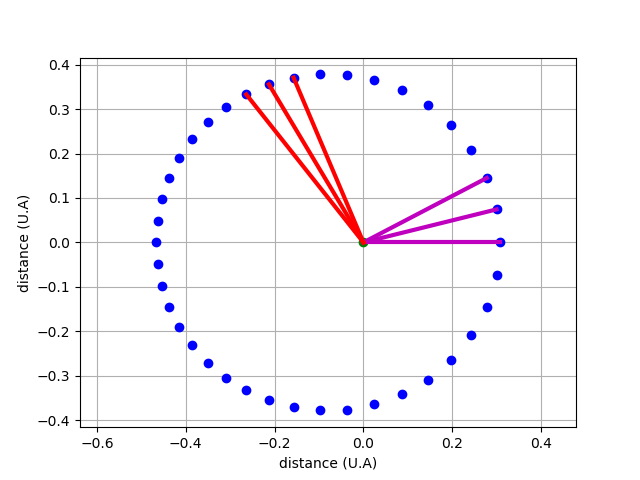

In [3]:
%matplotlib notebook
import matplotlib.pyplot as plt
import math as m
import scipy.optimize as op 
#déclaration des listes
t,M,u,theta,R,X,Y = [],[],[],[],[],[],[]

# Données d’astronomie de Mercure
a = 0.387  # demi grand axe en (UA)
T_rev = 0.240 #période de révolution (an) 
e = 0.206 # excentricité
N = 40# Nombre de positions

# Affichage de la durée entre deux positions successives de l'astre
print('Durée entre deux positions successives : ' + str(T_rev/N)+' an') 

# Résolution des équations de Kepler 
# Détermination de la position de l'astre autour de son orbite
for i in range(N):
    t.append(i*T_rev /N)
    M.append(2*m.pi/T_rev *t[i]) 
    u.append(float(op.fsolve (lambda x:x-e*m.sin(x)-M[i],0) ))
# Calcul des coordonnées polaires
    theta.append(2*m.atan((m.sqrt((1+e)/ (1-e))*m.tan(u[i]/2))))
    R.append(a*(1-e**2)/(1+e*m.cos(theta[i]))) 
# Calcul des corrdonnées cartésiennes
    X.append(R[i]*m.cos(theta[i])) 
    Y.append(R[i]*m.sin(theta[i]))

# Aires des triangles
# t1,t2 dates première aire et t2, t3 date de la seconde aire 
t1,t2 = 0,2 # intervalle entre la position 0 et 2
t3,t4 = 10,12 # intervalle entre la position 10 et 12 de l'orbite
# les positions peuvent changer mais l'intervalle entre deux dates doit rester le même


AIRE1,AIRE2 = 0,0 # initialisation des aires
i1,i2 = 0,0 

# Calcul de l’aire balayée entre t1 et t2
Delta_t1 =t2-t1 # calcul de l'intevalle de temps
for i1 in range(Delta_t1):
# Calcul des longueur des cotés des triangles
   long1 = m.sqrt((X[t1+i1])**2+(Y[t1+i1])**2)
   long2 = m.sqrt((X[t2+i1])**2+(Y[t2+i1])**2)
   long3 = m.sqrt((X[t2+i1]-X[t1+i1])**2+(Y[t2+i1]-Y[t1+i1])**2) 
# Calcul du demi périmètre
   S_1 = 1/2*(long1+long2+long3)
# Calcul de l'aire par la formule de Héron
   AIRE1 = m.sqrt(S_1*(S_1-long1)*(S_1-long2)*(S_1-long3))+AIRE1

# Calcul de l’aire balayée entre t2 et t3 
Delta_t2 =t4-t3 # calcul de l'intevalle de temps
for i2 in range(Delta_t2):
# Calcul des longueur des cotés des triangles
   long1b = m.sqrt((X[t3+i2])**2+(Y[t3+i2])**2)
   long2b = m.sqrt((X[t4+i2])**2+(Y[t4+i2])**2)
   long3b = m.sqrt((X[t4+i2]-X[t3+i2])**2+(Y[t4+i2]-Y[t3+i2])**2)
# Calcul du demi périmètre
   S_1b = 1/2*(long1b+long2b+long3b)
# Calcul de l'aire par la formule de Héron
   AIRE2 = m.sqrt(S_1b*(S_1b-long1b)*(S_1b-long2b)*(S_1b-long3b)) +AIRE2

# Affichage de la durée s'écoulant entre t1 et t2 et aussi entre t3 et t4 (unité : an)
print('Temps écoulé entre la position ' + str(t1)+' et la position ' +str(t2)+' --> ' + str(Delta_t1*T_rev/N)+'an') 
print('Temps écoulé entre la position ' + str(t3)+' et la position ' +str(t4)+' --> ' + str(Delta_t2*T_rev/N)+'an') 

# Affichage des aires balayées (unité : UA au carré)
print('Aire balayée entre la position ' + str(t1)+' et la position ' +str(t2)+' --> '+ str(AIRE1)+' UA^2') 
print('Aire balayée entre la position ' + str(t3)+' et la position ' +str(t4)+' --> '+ str(AIRE2)+' UA^2')

# Affichage de l’orbite 
plt.figure(1)
plt.grid(True) 
plt.xlabel("distance (U.A)") 
plt.ylabel("distance (U.A)") 
plt.axis('equal')
plt.plot(X,Y,"bo") 
plt.plot(0,0,"go")

# Affichage des rayons vecteurs entre t1 et t2 ainsi qu'entre t3 et t4
for i1 in range(Delta_t1+1):
    plt.plot([0,X[t1+i1]],[0,Y[t1+i1]],color='m',linewidth = 3)
for i2 in range(Delta_t2+1):
    plt.plot([0,X[t3+i2]],[0,Y[t3+i2]],color='r',linewidth = 3)
plt.show()

__Question 1 :__ Dans quel référentiel considéré comme galiléen est représenté l'orbite de Mercure ?

Répondre ici

__Question 2 :__ A quelle distance du Soleil se trouve l'aphélie de Mercure ? son périhélie ? (Mesurer les distances sur la figure 1)

Répondre ici

__Question 3 :__ En utilisant la figure 1, estimer la vitesse à l'aphélie et périhélie de Mercure.

Répondre ici

En faisant évoluer le programme, on peut identifier les planètes dont l'orbite est proche d'un cercle. Pour cela, il suffit de changer les données (valeur  du  demi-grand  axe $a$,  période de révolution $T$ et excentricité $e$) des différentes planètes dans le code précédent.  

__Question 4.a :__ Dans ce cas, de quelle valeur est proche l'excentricité e ?

Répondre ici

__Question 4.b :__ Donner les noms des planètes concernées ?

Répondre ici

__Question 4.c :__ Que peut-on dire de la vitesse de ces planètes sur leur orbite ?

Répondre ici

## 4. Deuxième loi de Kepler

### 2$^{ème}$ loi de Kepler 
![Deuxième loi de Kepler](Images/Kepler2.jpg)
On appelle $\mathscr{A}_1$ et $\mathscr{A}_2$ les aires balayées par le rayon vecteur partant du Soleil vers la planète durant les intervalles de temps $\Delta t_1$ et $\Delta t_2$.
D'après la 2ème loi de Kepler (loi des aires) : si les durées de parcours sont identiques $\Delta t_1=\Delta t_2$
alors $\mathscr{A}_1 =\mathscr{A}_2$

__Principe de calcul d'une aire balayée__
![Principe de calcul d'une aire balayée](Images/Aire_balayee.jpg)


__Question 5 :__ Repérer dans le programme précédent les parties concernant : le calcul de la longueur de chaque segment, le calcul du demi-périmètre et la formule de Héron.

Répondre ici

__Question 6 :__ Vérifier pour Mercure et pour une autre planète de votre choix que la 2ème loi de Kepler est assez bien vérifiée.

Répondre ici en notant les résultats donnés par le programme précédent pour les deux planètes.

## 5. Troisième loi de Kepler
### 3$^{ème}$ loi de Kepler 
![Troisième loi de Kepler](Images/Kepler3.jpg)
  
La cellule de code suivante permet de vérifier la 3ème loi de Kepler pour le système solaire. Il est adaptable à d'autres systèmes notamment les systèmes satellitaires comme celui de Jupiter.  

__Jupiter et ses satellites__
![Jupiter et ses satellites](Images/Jupiter.jpg)

__Régression linéaire__  
La régression linéaire est une méthode statistique permettant de trouver l’équation d'une fonction affine à partir d'un nuage de points issu de mesures. Le modèle est validé, si le coefficient de corrélation est proche de 1 ou -1, 0.9919... est une valeur convenable.
En langage Python, l'instruction `stat.linregress()` permet de trouver le coefficient directeur, l'ordonnée à l'origine et le coefficient de corrélation, valeurs stockées dans un tableau de trois valeurs.


Executer la cellule de code suivante pour le système solaire.

Coefficient directeur --> 2.9702583365475367e-19
Ordonnée à l origine --> -8567283284174336.0
Coefficient de corrélation -->0.9999955639899949


<IPython.core.display.Javascript object>


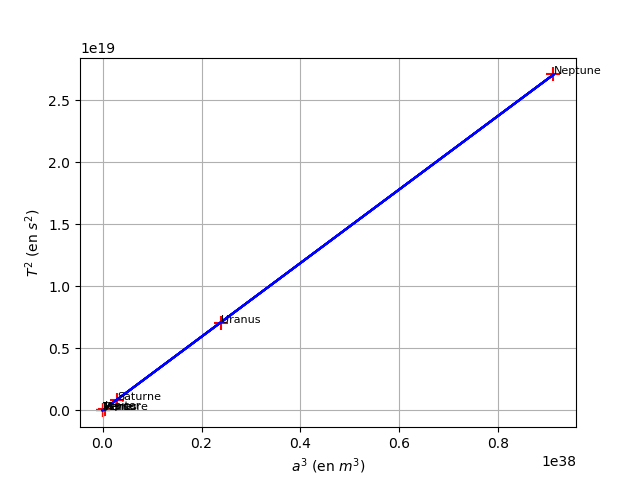

In [4]:
# import matplotlib.pyplot as plt
%matplotlib notebook
import scipy.stats as stat

# listes des demi-grands axes a en U.A et périodes des planètes en années

LIST_a = [0.39,0.72,1.0,1.5,5.2,9.5,19.2,30.0] #liste des demi-grands axes
LIST_T = [0.24,0.615,1,1.88,11.9,29.4,84,165.0] # liste périodes de révolution
LIST_P = ['Mercure','Venus','Terre','Mars','Jupiter','Saturne','Uranus','Neptune'] # nom des planètes

# création des listes a au cube et T au carré
for i in range(0, len(LIST_a)):
   LIST_a[i] = (LIST_a[i]*150e9)**3 # a est converti en mètre puis élevée au cube
   LIST_T[i] = (LIST_T[i]*365*24*3600)**2 # T estconverti en seconde puis élevé au carré

# régression linéaire
regression = stat.linregress(LIST_a,LIST_T) # regression est une liste des trois données : pente, ordonnée à l'origine et coefficient directeur
pente =regression[0] # récupération dans la variable pente du coefficient directeur
print('Coefficient directeur --> '+str(pente)) # Affichage du coefficient directeur
ordorigine =regression[1] #  récupération dans la variable ordorigine de l'ordonnée à l'origine
print('Ordonnée à l origine --> '+str(ordorigine)) # Affichage de l'ordonnée à l'origine
coeffcorel = regression[2] #récupération dans la variable coeffcorel du coefficient de correlation r
print('Coefficient de corrélation -->'+str(coeffcorel)) # Affichage du coefficient de correlation

#Calcul des coordonnées un points appartenant à la droite de régression
# ce point est utilisé pour tracer la droite sur le graphe
# la droite est tracé entre les points de coordonnées (0,0).et (a_3_max , T_2_max)
a_3_max = LIST_a[len(LIST_a)-1]
T_2_max =pente *a_3_max + ordorigine 

#Affichage du graphe
plt.figure(2)
plt.grid(True)
plt.xlabel("$a^3$ (en $m^3$)" ) 
plt.ylabel("$T^2$ (en $s^2$)")
 
plt.scatter(LIST_a,LIST_T,s = 100,c ='red',marker ='+') # affichage des points

# Affichage des noms et de la droite de regression
for i in range (0,len(LIST_a)): 
   plt.text(LIST_a[i],LIST_T[i], LIST_P[i],fontsize =8)
   plt.plot ([0,a_3_max],[ordorigine,T_2_max],c ='blue')
plt.show()

__Question 7 :__ D'après la figure 2, pourquoi peut-on dire qu'il y a une relation de proportionnalité entre $T^2$ et $a^3$ ? Cela est-il cohérent avec la troisième loi de Kepler ?

Répondre ici.

__Question 8 :__ Adapter la cellule de code précédente aux satellites de Jupiter en utilisant le tableau de données sur les satellites de Jupiter. Exécuter le programme et, à partir de la valeur du coefficient directeur, en déduire par calcul la masse de Jupiter. (Aide : utiliser l'expression de la 3$^{ème}$ loi de Kepler)

Répondre ici.

## Enregistrer ce notebook au format html

Tout d'abord, vérifiez que vous avez bien indiqué tout en haut du fichier votre nom.
Une fois que vous avez terminé de répondre aux questions, enregistrez ce notebook au format html en utilisant le menu `File` -> `Download as` -> `HTML (.html)` et envoyez le moi par Pronote en modifiant le nom du fichier html pour qu'il contienne votre nom.